In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime

In [2]:
#crate paths for csv files
CURR_DIR = os.getcwd()
print(CURR_DIR)
zlecenia_path = os.path.join(CURR_DIR, 'Zlecenia.csv')
godziny_path = os.path.join(CURR_DIR, 'Godziny.csv')

C:\Users\ksobo\Desktop\DS_final_project


In [3]:
#Zaciagniecie baz danych
zlecenia_df = pd.read_csv(zlecenia_path, sep=';')
godziny_df = pd.read_csv(godziny_path, sep=';')

In [4]:
#Ekstrakcja danych i organizacja danych - pozostawienie tylko kolumn wymaganych, pozostawienie tylko projektów zakończonych
zlecenia_df1 = zlecenia_df.drop(columns=['work_preparation_Plan','work_preparation_done', 'Finnish_week', 'Pre_fabrication_plan'], axis=1)
zlecenia_df2 = zlecenia_df1.loc[-zlecenia_df1['Active'].isin(['Active'])]
godziny_df = godziny_df[['No','Wszystkie.wykonane']]
zlecenia_df2

,No,Description,Weight_for_1,Quantity,Typ,Active
0,1,2320,3360,1,B,0
1,2,2320,3360,1,B,0
2,3,3230,6400,1,B,0
3,4,2830,6230,2,C,0
4,5,2625,5000,2,C,0
...,...,...,...,...,...,...
1229,1230,1412,970,2,B,0
1230,1231,1412,970,2,B,0
1231,1232,1412,970,2,B,0
1232,1233,1412,970,2,B,0


In [5]:
#Left join po No z godzinami
zlecenia_df2 = pd.merge(zlecenia_df2, godziny_df, how='left', on='No')

In [6]:
#Wyliczenie realnych równoważników zleceń
zlecenia_df2['Labor_rate'] = zlecenia_df2['Wszystkie.wykonane'] / (zlecenia_df2['Weight_for_1'] * zlecenia_df2['Quantity']) 

In [7]:
zlecenia_df3 = zlecenia_df2[['Weight_for_1', 'Typ', 'Labor_rate']]

In [8]:
#Jak zorbić buckety na 500kg i z tego średnie na etapach
bins = [*range(0, 13000, 500)]
zlecenia_df3['Bin'] = pd.cut(zlecenia_df3['Weight_for_1'], bins, bins)

<ipython-input-8-879e78937ba1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zlecenia_df3['Bin'] = pd.cut(zlecenia_df3['Weight_for_1'], bins, bins)


In [9]:
typ_A = zlecenia_df3.loc[zlecenia_df2['Typ'].isin(['A'])].sort_values(by=['Labor_rate']).rename(columns = {'Labor_rate': 'Labor_rate_A'}, inplace = False)
typ_B = zlecenia_df3.loc[zlecenia_df2['Typ'].isin(['B'])].sort_values(by=['Labor_rate']).rename(columns = {'Labor_rate': 'Labor_rate_B'}, inplace = False)
typ_C = zlecenia_df3.loc[zlecenia_df2['Typ'].isin(['C'])].sort_values(by=['Labor_rate']).rename(columns = {'Labor_rate': 'Labor_rate_C'}, inplace = False)

AxesSubplot(0.125,0.125;0.775x0.755)
                Weight_for_1  Labor_rate_A
Bin                                       
(0, 500]          311.376812      0.447091
(500, 1000]       672.131148      0.197006
(1000, 1500]     1168.888889      0.133122
(1500, 2000]     1768.750000      0.114094
(2000, 2500]     2330.588235      0.071534
(2500, 3000]     2706.666667      0.068859
(3000, 3500]             NaN           NaN
(3500, 4000]     3740.000000      0.074800
(4000, 4500]     4363.333333      0.068388
(4500, 5000]             NaN           NaN
(5000, 5500]             NaN           NaN
(5500, 6000]             NaN           NaN
(6000, 6500]             NaN           NaN
(6500, 7000]     6900.000000      0.064482
(7000, 7500]             NaN           NaN
(7500, 8000]             NaN           NaN
(8000, 8500]             NaN           NaN
(8500, 9000]             NaN           NaN
(9000, 9500]             NaN           NaN
(9500, 10000]            NaN           NaN
(10000, 10500]   

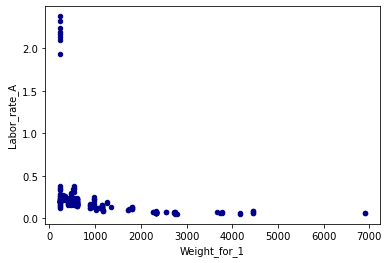

In [10]:
#Typ_A
typ_A_plot = typ_A.plot.scatter(x='Weight_for_1',
                      y='Labor_rate_A',
                      c='DarkBlue')

typ_A_mean = typ_A.groupby(['Bin']).mean()
print(typ_A_plot)
print(typ_A_mean)

AxesSubplot(0.125,0.125;0.775x0.755)
                Weight_for_1  Labor_rate_B
Bin                                       
(0, 500]          382.962963      0.241824
(500, 1000]       827.027027      0.178132
(1000, 1500]     1197.425743      0.161425
(1500, 2000]     1797.631579      0.115794
(2000, 2500]     2372.916667      0.092807
(2500, 3000]     2793.414634      0.083071
(3000, 3500]     3273.928571      0.071953
(3500, 4000]     3688.000000      0.064328
(4000, 4500]     4266.976744      0.064636
(4500, 5000]     4892.631579      0.065621
(5000, 5500]     5375.600000      0.061118
(5500, 6000]     6000.000000      0.060627
(6000, 6500]     6400.000000      0.081577
(6500, 7000]     6900.000000      0.105246
(7000, 7500]             NaN           NaN
(7500, 8000]     8000.000000      0.064625
(8000, 8500]             NaN           NaN
(8500, 9000]     8540.000000      0.056065
(9000, 9500]     9050.000000      0.078033
(9500, 10000]   10000.000000      0.073100
(10000, 10500]   

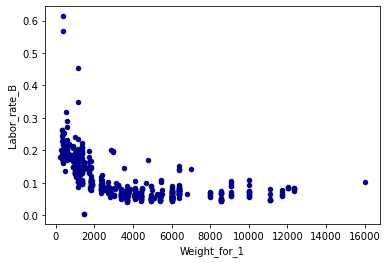

In [11]:
typ_B_plot = typ_B.plot.scatter(x='Weight_for_1',
                      y='Labor_rate_B',
                      c='DarkBlue')

typ_B_mean = typ_B.groupby(['Bin']).mean()
print(typ_B_plot)
print(typ_B_mean)

AxesSubplot(0.125,0.125;0.775x0.755)
                Weight_for_1  Labor_rate_C
Bin                                       
(0, 500]          444.166667      0.221571
(500, 1000]       547.407407      0.175184
(1000, 1500]     1217.878788      0.122190
(1500, 2000]     1801.333333      0.123229
(2000, 2500]     2369.666667      0.090184
(2500, 3000]     2771.304348      0.091162
(3000, 3500]             NaN           NaN
(3500, 4000]     3640.681818      0.067063
(4000, 4500]     4315.714286      0.072643
(4500, 5000]     4886.296296      0.070976
(5000, 5500]     5460.000000      0.078121
(5500, 6000]     5930.000000      0.071190
(6000, 6500]     6230.000000      0.078250
(6500, 7000]     6800.000000      0.064504
(7000, 7500]     7406.875000      0.066219
(7500, 8000]             NaN           NaN
(8000, 8500]     8400.000000      0.060417
(8500, 9000]     8810.000000      0.076050
(9000, 9500]     9280.000000      0.081915
(9500, 10000]            NaN           NaN
(10000, 10500]   

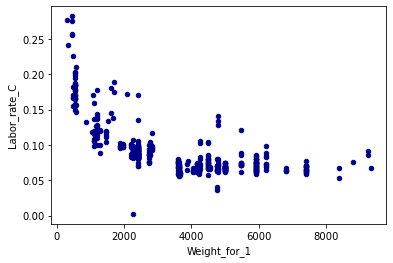

In [12]:
typ_C_plot = typ_C.plot.scatter(x='Weight_for_1',
                      y='Labor_rate_C',
                      c='DarkBlue')

typ_C_mean = typ_C.groupby(['Bin']).mean()
print(typ_C_plot)
print(typ_C_mean)

In [13]:
#Pogrupowanie po Typie i wyciągnięcie średniej - tak dla szybkiego zerknięcia czy ma to sens
zlecenia_mean = zlecenia_df2.groupby(['Typ']).mean()

print(zlecenia_mean)

             No  Description  Weight_for_1  Quantity  Wszystkie.wykonane  \
Typ                                                                        
A    675.484536  1326.376289   1116.469072  2.422680          333.615979   
B    620.742321  2260.571672   3659.675768  1.571672          439.688567   
C    560.081585  2193.731935   3562.121212  1.951049          548.962704   

     Labor_rate  
Typ              
A      0.251804  
B      0.110871  
C      0.092586  


In [14]:
#Zlecenia które nie zostały opracowane wypełnione zostaną wartościami przewidzianymi w prekalkulacji

#A - dziób(wędka)
    #Labor rate	130 rbg/1000kg
#Assembling	0,4
#Welding	0,33
#Grindining	0,07
#Else		0,2

#B - belka(środek)
#Labor rate	100 rbg/1000kg
#Assembling	0,3
#Welding	0,4
#Grindining	0,2
#Else		0,1

#C - gniazdo(końcówka)
#Labor rate	120 rbg/1000kg
#Assembling	0,25
#Welding	0,4
#Grindining	0,2
#Else		0,15

In [15]:
#Porównanie
juxtapose_AB =  pd.merge(typ_A_mean, typ_B_mean, how='left', on='Bin')
juxtapose_ABC = pd.merge(juxtapose_AB, typ_C_mean, how='left', on='Bin')
juxtapose_ABC = juxtapose_ABC[['Labor_rate_A','Labor_rate_B','Labor_rate_C']]
juxtapose_ABC['Mean'] = juxtapose_ABC.mean(axis=1)
juxtapose_ABC

,Labor_rate_A,Labor_rate_B,Labor_rate_C,Mean
Bin,,,,
"(0, 500]",0.447091,0.241824,0.221571,0.303496
"(500, 1000]",0.197006,0.178132,0.175184,0.183441
"(1000, 1500]",0.133122,0.161425,0.122190,0.138912
"(1500, 2000]",0.114094,0.115794,0.123229,0.117706
"(2000, 2500]",0.071534,0.092807,0.090184,0.084841
"(2500, 3000]",0.068859,0.083071,0.091162,0.081031
"(3000, 3500]",NaN,0.071953,NaN,0.071953
"(3500, 4000]",0.074800,0.064328,0.067063,0.068731
"(4000, 4500]",0.068388,0.064636,0.072643,0.068556


In [16]:
juxtapose_ABC.Labor_rate_A = np.where(juxtapose_ABC.Labor_rate_A.isnull(), juxtapose_ABC.Mean, juxtapose_ABC.Labor_rate_A)
juxtapose_ABC.Labor_rate_B = np.where(juxtapose_ABC.Labor_rate_B.isnull(), juxtapose_ABC.Mean, juxtapose_ABC.Labor_rate_B)
juxtapose_ABC.Labor_rate_C = np.where(juxtapose_ABC.Labor_rate_C.isnull(), juxtapose_ABC.Mean, juxtapose_ABC.Labor_rate_C)
juxtapose_ABC

,Labor_rate_A,Labor_rate_B,Labor_rate_C,Mean
Bin,,,,
"(0, 500]",0.447091,0.241824,0.221571,0.303496
"(500, 1000]",0.197006,0.178132,0.175184,0.183441
"(1000, 1500]",0.133122,0.161425,0.122190,0.138912
"(1500, 2000]",0.114094,0.115794,0.123229,0.117706
"(2000, 2500]",0.071534,0.092807,0.090184,0.084841
"(2500, 3000]",0.068859,0.083071,0.091162,0.081031
"(3000, 3500]",0.071953,0.071953,0.071953,0.071953
"(3500, 4000]",0.074800,0.064328,0.067063,0.068731
"(4000, 4500]",0.068388,0.064636,0.072643,0.068556


In [17]:
juxtapose_ABCM = juxtapose_ABC.mean()
round(juxtapose_ABCM, 2)

Labor_rate_A    0.10
Labor_rate_B    0.09
Labor_rate_C    0.09
Mean            0.09
dtype: float64

In [18]:
juxtapose_ABC.Labor_rate_A = np.where(juxtapose_ABC.Labor_rate_A.isnull(), juxtapose_ABCM.Mean, juxtapose_ABC.Labor_rate_A)
juxtapose_ABC.Labor_rate_B = np.where(juxtapose_ABC.Labor_rate_B.isnull(), juxtapose_ABCM.Mean, juxtapose_ABC.Labor_rate_B)
juxtapose_ABC.Labor_rate_C = np.where(juxtapose_ABC.Labor_rate_C.isnull(), juxtapose_ABCM.Mean, juxtapose_ABC.Labor_rate_C)
juxtapose_ABC = round(juxtapose_ABC, 2)
#juxtapose_ABC.to_csv('New_Precalc.csv', sep=';') - wykomentowane w celu nienadpisywanie pliku w za każdym razem
juxtapose_ABC

,Labor_rate_A,Labor_rate_B,Labor_rate_C,Mean
Bin,,,,
"(0, 500]",0.45,0.24,0.22,0.30
"(500, 1000]",0.20,0.18,0.18,0.18
"(1000, 1500]",0.13,0.16,0.12,0.14
"(1500, 2000]",0.11,0.12,0.12,0.12
"(2000, 2500]",0.07,0.09,0.09,0.08
"(2500, 3000]",0.07,0.08,0.09,0.08
"(3000, 3500]",0.07,0.07,0.07,0.07
"(3500, 4000]",0.07,0.06,0.07,0.07
"(4000, 4500]",0.07,0.06,0.07,0.07
